In [1]:
# import python libraries and packages
from textblob import TextBlob
import json
import matplotlib.pyplot as plt
%matplotlib inline  
from  matplotlib import style
import pandas as pd
import numpy as np
from itertools import *
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

#import all necessary packages for nltk, regex, and stopwords 
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('breweries.csv', encoding="latin1")

In [3]:
df.head()

,id,address,categories,city,country,hours,keys,latitude,longitude,menus,name,postalCode,province,twitter,websites
0,AVweN1T_ByjofQCxwSPL,Syr Airport,Brewery,Syracuse,US,NaN,us/ny/syracuse/syrairport/2098450797,NaN,NaN,NaN,Adirondack Pub,NaN,NY,NaN,NaN
1,AVwdkF9ZIN2L1WUfxDfw,1320 N Doctor Martin Luther King Dr,Office and Cafeteria Brewer's Hill,Milwaukee,US,NaN,us/wi/milwaukee/1320ndoctormartinlutherkingdr/...,NaN,NaN,NaN,The Waterfront Cafe,53212,WI,NaN,NaN
2,AVwdlPkf_7pvs4fz7TMr,608 4th St,Brewery Downtown Clovis,Clovis,US,"[{""day"":""Wed - Sat"",""hour"":""5:00 PM - 8:00 PM""}]",us/ca/clovis/6084thst/-932885010,NaN,NaN,NaN,559 Local Brewing,93612,CA,NaN,http://fresnobrewing.com
3,AVwcucY0kufWRAb5yWbU,1103 Mills St,breweries & brew pubs,Black Earth,US,NaN,us/wi/blackearth/1103millsst/-757413411,43.138995,-89.747904,NaN,Shack The,53515-9454,WI,NaN,NaN
4,AVweCkd5kufWRAb5_eaI,130 W Riverside Dr,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville,US,"[{""day"":""Wed - Thu"",""hour"":""3:00 PM - 9:00 PM""...",us/utica/jeffersonville/130wriversidedr/787280564,NaN,NaN,NaN,Flat12 Bierworks,47130,Utica,flat12bierwerks,http://flat12.me/brewery


In [4]:
df.describe()

,latitude,longitude
count,12324.000000,12324.000000
mean,38.479784,-95.132892
std,6.782906,24.187294
min,-33.753057,-159.675711
25%,34.842550,-117.258450
50%,39.331516,-91.253230
75%,42.360285,-80.353903
max,64.958011,126.981607


In [5]:
df.shape

(17823, 15)

In [6]:
brew_catg = df[['categories','city']]

In [7]:
brew_catg.head()

,categories,city
0,Brewery,Syracuse
1,Office and Cafeteria Brewer's Hill,Milwaukee
2,Brewery Downtown Clovis,Clovis
3,breweries & brew pubs,Black Earth
4,Brewery and Gastropub Downtown Jeffersonville,Jeffersonville


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17823 entries, 0 to 17822
Data columns (total 15 columns):
id            17823 non-null object
address       17823 non-null object
categories    17823 non-null object
city          17823 non-null object
country       17823 non-null object
hours         8015 non-null object
keys          17823 non-null object
latitude      12324 non-null float64
longitude     12324 non-null float64
menus         1479 non-null object
name          17823 non-null object
postalCode    17198 non-null object
province      17823 non-null object
twitter       3050 non-null object
websites      6566 non-null object
dtypes: float64(2), object(13)
memory usage: 2.0+ MB


In [9]:
brew_catg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17823 entries, 0 to 17822
Data columns (total 2 columns):
categories    17823 non-null object
city          17823 non-null object
dtypes: object(2)
memory usage: 278.6+ KB


In [10]:
# create two dataframes and string objects
df_str = brew_catg.to_string()
df_str2 = df_str.lower()

In [11]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
from os import path
from scipy.misc import imread
import random
from wordcloud import WordCloud, STOPWORDS

In [12]:
#import other python packages and libraries to do wordclouds, wordcounts, and remove stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


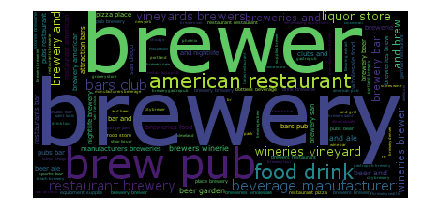

In [13]:
#create a wordclouds for string objects
dfbrew_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {''} 
                      ).generate(df_str2)
plt.imshow(dfbrew_wc)
plt.axis("off")
plt.show() 

[('and', 2968), ('&', 2848), ('brewery', 2818), ('brewers', 2729), ('brew', 999), ('breweries', 716), ('beverage', 578), ('american', 517), ('beer', 439), ('food', 428), ('...', 393), ('drink', 390), ('restaurant,brewery', 340), ('wineries,brewers', 325), ('wineries,vineyards,brewers', 322), ('attraction,bars,clubs', 320), ('equipment', 312), ('restaurant', 311), ('bars', 293), ('breweries,food', 288), ('brewery,american', 288), ('pubs', 280), ('manufacturers,breweries', 262), ('bar', 262), ('liquor', 253), ('brewery,beer', 235), ('wholesale', 223), ('nightlife,brewery', 221), ('brewers,wineries', 202), ('brewery,', 201), ('pubs,beer', 200), ('wine', 196), ('garden', 182), ('drink,breweries', 163), ('ale', 144), ('bar,', 127), ('brewery,brewery', 124), ('brewery,restaurant', 118), ('bottlers,beverage', 115), ('clubs,bars', 114), ('restaurant,pizza', 112), ('r...', 102), ('pubs,bars', 100), ('ale,liquor', 99), ('brewers,brewery', 99), ('winemaking', 97), ('pub', 97), ('foods', 96), ('ma

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


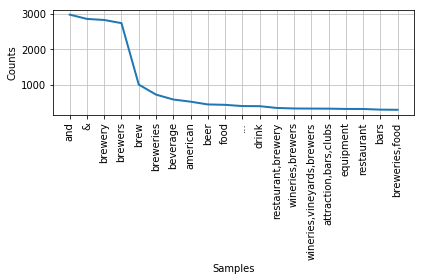

None


In [14]:
# dataframe for just reviews
df_new = df[['categories']]

# create two dataframes and string objects
df_new_str = df_new.to_string()
df_new_str2 = df_new_str.lower()
df_new_str3 = df_new_str2.replace('-','')
df_new_str4 = df_new_str3.split()

# frequency distribution
freq_words = nltk.FreqDist(df_new_str4)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(20))

In [15]:
denver = brew_catg[brew_catg.city=='Denver']
denver = pd.DataFrame(denver)
portland = brew_catg[brew_catg.city=='Portland']
portland = pd.DataFrame(portland)
sd = brew_catg[brew_catg.city=='San Diego']
sd = pd.DataFrame(sd)
sea = brew_catg[brew_catg.city=='Seattle']
sea = pd.DataFrame(sea)
chicago = brew_catg[brew_catg.city=='Chicago']
chicago = pd.DataFrame(chicago)

In [16]:
denver.head()

,categories,city
568,Brewery,Denver
640,Breweries & Wineries,Denver
700,"Music Venue,Bar and Music Venue,Bar,Pubs,Bars ...",Denver
770,"Music Venue,Bars & Pubs,Pubs,Breweries,Bar",Denver
1002,"American Restaurant,Brewery,Fast Food Restaura...",Denver


In [17]:
print(denver.shape)
print(portland.shape)
print(sd.shape)
print(sea.shape)
print(chicago.shape)

(216, 2)
(228, 2)
(294, 2)
(251, 2)
(188, 2)


In [18]:
# create two dataframes and string objects
denver_str = denver.to_string()
denver_str2 = denver_str.lower()

portland_str = portland.to_string()
portland_str2 = portland_str.lower()

sd_str = sd.to_string()
sd_str2 = sd_str.lower()

sea_str = sea.to_string()
sea_str2 = sea_str.lower()

chicago_str = chicago.to_string()
chicago_str2 = chicago_str.lower()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


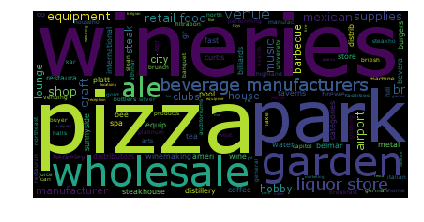

In [19]:
#create a wordclouds for string objects
denver_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'restaurants','american','brewer','beer','pubs','bars','brewery','restaurant','denver','breweries','brew','pub','brewers','and','bar'} 
                      ).generate(denver_str2)
plt.imshow(denver_wc)
plt.axis("off")
plt.show() 

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


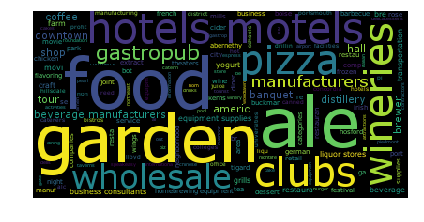

In [20]:
#create a wordclouds for string objects
portland_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'american','portland','place','restaurants','drink','store''brewer','beer','pubs','bars','brewery','restaurant','denver','breweries','brew','pub','brewers','and','bar'} 
                      ).generate(portland_str2)
plt.imshow(portland_wc)
plt.axis("off")
plt.show() 

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


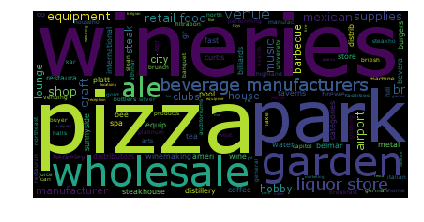

In [21]:
#create a wordclouds for string objects
sea_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'diego','san','san diego','american','portland','place','restaurants','drink','store''brewer','beer','pubs','bars','brewery','restaurant','denver','breweries','brew','pub','brewers','and','bar'} 
                      ).generate(sea_str2)
plt.imshow(denver_wc)
plt.axis("off")
plt.show()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


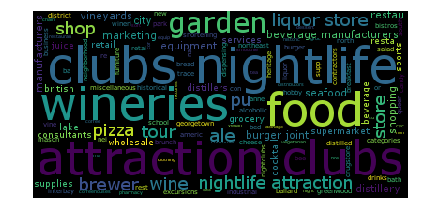

In [22]:
#create a wordclouds for string objects
sea_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'seattle','diego','san','san diego','american','portland','place','restaurants','drink','store''brewer','beer','pubs','bars','brewery','restaurant','denver','breweries','brew','pub','brewers','and','bar'} 
                      ).generate(sea_str2)
plt.imshow(sea_wc)
plt.axis("off")
plt.show()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


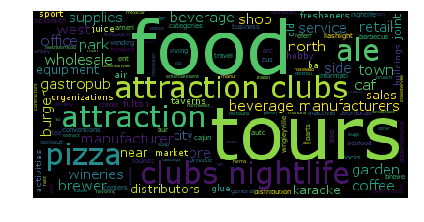

In [23]:
#create a wordclouds for string objects
chicago_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'chicago','seattle','diego','san','san diego','american','portland','place','restaurants','drink','store''brewer','beer','pubs','bars','brewery','restaurant','denver','breweries','brew','pub','brewers','and','bar'} 
                      ).generate(chicago_str2)
plt.imshow(chicago_wc)
plt.axis("off")
plt.show()

[('brewery', 2818), ('brewers', 2729), ('brew', 999), ('breweries', 716), ('beverage', 578), ('american', 517), ('...', 459), ('beer', 439), ('food', 428), ('drink', 390), ('restaurant,brewery', 340), ('wineries,brewers', 325), ('wineries,vineyards,brewers', 322), ('attraction,bars,clubs', 320), ('equipment', 312), ('restaurant', 311), ('bars', 293), ('breweries,food', 288), ('brewery,american', 288), ('pubs', 280), ('manufacturers,breweries', 262), ('bar', 262), ('liquor', 253), ('brewery,beer', 235), ('wholesale', 223), ('nightlife,brewery', 221), ('brewers,wineries', 202), ('brewery,', 201), ('pubs,beer', 200), ('wine', 196), ('garden', 182), ('drink,breweries', 163), ('ale', 144), ('bar,', 127), ('brewery,brewery', 124), ('brewery,restaurant', 118), ('bottlers,beverage', 115), ('clubs,bars', 114), ('restaurant,pizza', 112), ('r...', 102), ('pubs,bars', 100), ('ale,liquor', 99), ('brewers,brewery', 99), ('winemaking', 97), ('pub', 97), ('foods', 96), ('manufacturers,beverage', 93), 

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


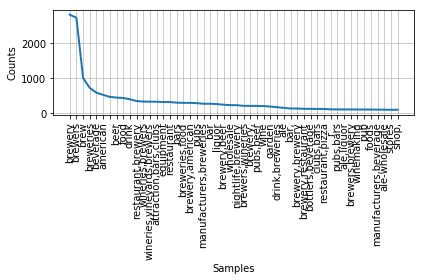

None


In [24]:
# dataframe for just reviews
denver_new = denver[['categories']]

# create two dataframes and string objects
df_new_str = df_new.to_string()
df_new_str2 = df_new_str.lower()
df_new_str3 = df_new_str2.replace('and','')
df_new_str4 = df_new_str3.replace('&','')
df_new_str5 = df_new_str4.split()

# frequency distribution
freq_words = nltk.FreqDist(df_new_str5)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(50))

/Users/saultamariz/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


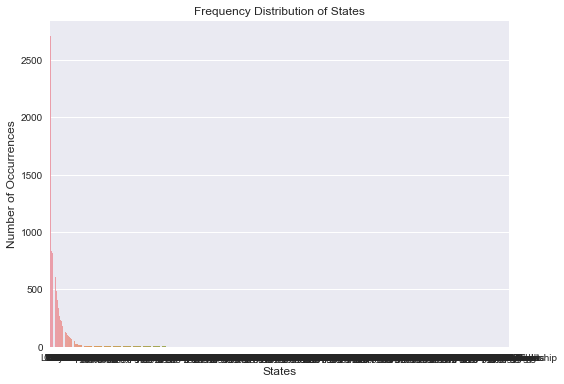

In [25]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
state_count = df['province'].value_counts()
sns.set(style="darkgrid")
sns.barplot(state_count.index, state_count.values, alpha=0.9)
plt.title('Frequency Distribution of States')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.show()

In [26]:
print(state_count[0:20])

CA    2707
NY     846
FL     838
TX     829
WA     814
CO     757
PA     689
OR     633
OH     624
NC     612
MI     517
IL     484
VA     443
WI     410
AZ     368
NJ     334
MA     297
IN     272
MN     255
GA     237
Name: province, dtype: int64


In [27]:
city_count = df['city'].value_counts()
print(city_count[0:20])

San Diego        294
Seattle          251
Portland         228
Denver           216
Chicago          188
Austin           141
Milwaukee        134
Columbus         131
Houston          120
New York          98
San Francisco     95
Philadelphia      92
Dallas            91
Phoenix           89
Charlotte         88
Cincinnati        86
Cleveland         86
Minneapolis       86
Albuquerque       83
Saint Louis       79
Name: city, dtype: int64


In [28]:
category_count = df['categories'].value_counts()
print(category_count[0:1000])

Brewers                                                                                                                                                                                                                                                                                     2727
Brewery                                                                                                                                                                                                                                                                                     2053
Wineries,Brewers                                                                                                                                                                                                                                                                             325
Wineries,Vineyards,Brewers                                                                                                           

In [29]:
zipcode_count = df['postalCode'].value_counts()
print(zipcode_count[0:5])

93446    51
94558    49
95448    44
43215    42
99362    39
Name: postalCode, dtype: int64


In [30]:
name_count = df['name'].value_counts()
print(name_count[0:20])

Total Wine & More                    113
BJ's Restaurant and Brewhouse        111
Coca-Cola Bottling Co                 45
Gordon Biersch Brewery Restaurant     44
Pepsi Bottling Group                  42
Rock Bottom Restaurant & Brewery      41
Granite City Food & Brewery           41
BJ's Restaurant & Brew House          37
Kroger                                36
Coca-Cola Enterprises Inc             33
Total Wine More                       30
BJ's Restaurant & Brewhouse           25
World of Beer                         21
Pepsi Beverages Co                    18
Dr Pepper Snapple Group               17
100 Montaditos                        16
Coca-Cola Bottling Co.                16
Coca-Cola Co                          15
Fry's Food and Drug                   15
World Of Beer                         15
Name: name, dtype: int64


In [31]:
twitter_count = df['twitter'].value_counts()
print(twitter_count[0:10])

bjsrestaurants    135
totalwine         124
hmshost            24
captainneon        21
gcfb               17
theram             16
bevmo              15
rockbottom         12
gordon_biersch     10
frysfoodstores      8
Name: twitter, dtype: int64


In [32]:
websites_count = df['websites'].value_counts()
print(websites_count[0:10])

http://t.co/bl46gcjDLN       92
http://totalwine.com         40
http://kroger.com            36
http://www.totalwine.com     32
http://gordonbiersch.com     28
http://theram.com            14
http://oggis.com             11
http://rockbottom.com         9
http://www.rockbottom.com     9
http://gcfb.net               9
Name: websites, dtype: int64


In [33]:
hours_count = df['hours'].value_counts()
print(hours_count[0:10])

[{"day":"Monday - Thursday, Sunday","hour":"11:00 AM - 11:00 PM"},{"day":"Friday - Saturday","hour":"11:00 AM - 12:00 AM"}]                                                                                                         26
[{"day":"Monday - Thursday, Sunday","hour":"11:00 AM - 12:00 AM"},{"day":"Friday - Saturday","hour":"11:00 AM - 1:00 AM"},{"day":"Mon - Thu, Sun","hour":"11:00 AM - Midnight"},{"day":"Fri - Sat","hour":"11:00 AM - 1:00 AM"}]    15
[{"day":"Monday - Thursday, Sunday","hour":"11:00 AM - 12:00 AM"},{"day":"Friday - Saturday","hour":"11:00 AM - 1:00 AM"}]                                                                                                          15
[{"day":"Monday - Sunday","hour":"11:00 AM - 12:00 AM"}]                                                                                                                                                                            14
[{"day":"Monday - Thursday","hour":"11:00 AM - 11:00 PM"},{"day":"Friday - S

In [34]:
keys_count = df['keys'].value_counts()
print(keys_count[0:10])

us/va/charlottesville/3624lenoxave/554746294                5
us/in/chesterton/1535scalumetrd/-1543617715                 5
us/colorado/arvada/5600oldewadsworthblvd/1936691348         5
us/california/napa/1executiveway/381950075                  5
us/colorado/denver/denverinternationalairport/1021883261    5
us/ar/rogers/2001sbellviewrd2/1958090811                    5
us/colorado/westminster/7655west108thave/-368805767         5
us/ny/binghamton/41courtst/-1424567315                      4
us/in/mishawaka/100ncenterst/-1567161083                    4
us/in/mishawaka/6501graperdste1000/1241605439               4
Name: keys, dtype: int64


In [35]:
cats = pd.DataFrame(df['categories'])

In [36]:
cats_clean = cats['categories'].str.lower()
cats_clean = cats_clean.str.replace('&',',')
cats_clean = cats_clean.str.replace('and', ',')
cats_clean = cats_clean.str.replace('brewers','brewery')
cats_clean = cats_clean.str.replace('food','restaurant')
cats_clean = cats_clean.str.replace('breweries', 'brewery')
cats_clean = cats_clean.str.replace('drink','pub')
cats_clean = cats_clean.str.replace('bar','pub')
cats_clean = cats_clean.str.replace('pubs','pub')
cats_clean = cats_clean.str.replace('brew pub','pub')
cats_clean = cats_clean.str.replace('manufacturer','manufacturers')
cats_clean = cats_clean.str.replace('nightlife','club')
cats_clean = cats_clean.str.replace('clubs','club')
cats_clean = cats_clean.str.replace('beverage','pub')
cats_clean = cats_clean.str.replace('manufacturerss','manufacturers')
cats_clean = cats_clean.str.replace('beer garden','pub')
cats_clean = cats_clean.str.replace('attraction','pub')
cats_clean = cats_clean.str.replace('pub manufacturers','manufacturers')
cats_clean = cats_clean.str.replace(" ", "")

In [37]:
cats_clean.head()

0                                    brewery
1               office,cafeteriabrewer'shill
2                      brewerydowntownclovis
3                                brewery,pub
4    brewery,gastropubdowntownjeffersonville
Name: categories, dtype: object

In [38]:
cats_count = cats_clean.value_counts()
print(cats_count[0:20])

brewery                            4954
brewery,pub                         435
wineries,brewery                    325
wineries,vineyards,brewery          322
brewery,restaurant,pub              277
brewery,wineries                    223
pub,pub,club,club,brewery           218
restaurant,pub,brewery              210
brewery,brewery                     203
manufacturers,brewery               191
brewery,restaurant                  175
restaurant,brewery                  139
pub,brewery                         136
brewery,americanrestaurant           86
restaurant,american,pub,brewery      74
brewery,wholesalerestaurants         64
bottlers,manufacturers,brewery       59
brewery,pub,brewery,pub              47
manufacturers,bottlers,brewery       46
americanrestaurant,brewery           46
Name: categories, dtype: int64


In [39]:
print(category_count[0:20])

Brewers                                        2727
Brewery                                        2053
Wineries,Brewers                                325
Wineries,Vineyards,Brewers                      322
Breweries,Food & Drink                          270
Attraction,Bars,Clubs and Nightlife,Brewery     218
Brewers,Wineries                                202
Beverage Manufacturers,Breweries                189
breweries & brew pubs                           150
Restaurant,Brewery                              128
Food & Drink,Breweries                          125
Brewery,Restaurant                              109
Brewery,Brewers                                  86
brewery                                          85
Brewers,Brewery                                  82
Brewery,American Restaurant                      74
Breweries                                        71
Restaurant,Pubs,Brewery                          70
Brewery,Bar                                      69
Breweries,Wh

In [40]:
#nltk.download()

In [41]:
cats_count_list = cats_clean.tolist()

In [42]:
from nltk import pos_tag, word_tokenize

In [43]:
denver_pos = pos_tag(word_tokenize(denver_str))

In [44]:
denver_pos_df = pd.DataFrame(denver_pos, columns=['categories','pos'])

In [45]:
denver_pos_df.head()

,categories,pos
0,categories,NNS
1,city,NN
2,568,CD
3,Brewery,NNP
4,Denver,NNP


In [46]:
# how to write a csv file 
#import csv 
#with open("example.csv", "w", newline="") as file:
#    writer = csv.writer(file)
#    writer.writerows(denver_pos)

In [47]:
from collections import Counter 
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#def get_pos( word ):
#    w_synsets = wordnet.synsets(word)

#    pos_counts = Counter()
#    pos_counts["n"] = len(  [ item for item in w_synsets if item.pos()=="n"]  )
#    pos_counts["v"] = len(  [ item for item in w_synsets if item.pos()=="v"]  )
#    pos_counts["a"] = len(  [ item for item in w_synsets if item.pos()=="a"]  )
#    pos_counts["r"] = len(  [ item for item in w_synsets if item.pos()=="r"]  )
#    
#    most_common_pos_list = pos_counts.most_common(3)
#    return most_common_pos_list[0][0]

In [48]:
#words = ["running","lying","cars","m!spleed"]
#lematizer = WordNetLemmatizer()
#for word in cats_clean:
#    print(lematizer.lemmatize(word, get_pos(word)))

In [49]:
cats_count = cats_clean.value_counts()
print(cats_count[0:20])

brewery                            4954
brewery,pub                         435
wineries,brewery                    325
wineries,vineyards,brewery          322
brewery,restaurant,pub              277
brewery,wineries                    223
pub,pub,club,club,brewery           218
restaurant,pub,brewery              210
brewery,brewery                     203
manufacturers,brewery               191
brewery,restaurant                  175
restaurant,brewery                  139
pub,brewery                         136
brewery,americanrestaurant           86
restaurant,american,pub,brewery      74
brewery,wholesalerestaurants         64
bottlers,manufacturers,brewery       59
brewery,pub,brewery,pub              47
manufacturers,bottlers,brewery       46
americanrestaurant,brewery           46
Name: categories, dtype: int64


In [50]:
cats_count.asfreq

<bound method NDFrame.asfreq of brewery                                                                                                                                                                                                                                                                              4954
brewery,pub                                                                                                                                                                                                                                                                           435
wineries,brewery                                                                                                                                                                                                                                                                      325
wineries,vineyards,brewery                                                                                                

[('brewery', 4954), ('brewery,pub', 435), ('wineries,brewery', 325), ('wineries,vineyards,brewery', 322), ('brewery,restaurant,pub', 277), ('brewery,wineries', 223), ('pub,pub,club,club,brewery', 218), ('restaurant,pub,brewery', 210), ('brewery,brewery', 203), ('manufacturers,brewery', 191), ('brewery,restaurant', 175), ('restaurant,brewery', 139), ('pub,brewery', 136), ('brewery,americanrestaurant', 86), ('restaurant,american,pub,brewery', 74), ('brewery,wholesalerestaurants', 64), ('bottlers,manufacturers,brewery', 59), ('brewery,pub,brewery,pub', 47), ('americanrestaurant,brewery', 46), ('manufacturers,bottlers,brewery', 46), ('wholesalerestaurants,brewery', 45), ('restaurant,american,brewery', 42), ('brewery,pub,restaurant', 35), ('brewerequipmentsupplies,services', 32), ('winemakingequipment,supplies,brewerequipmentsupplies,services', 31), ('brewery,germanrestaurant', 31), ('pub,pub,club,club,brewery,pub', 29), ('brewery,pub,pub', 28), ('restaurant,pub,brewery,brewery', 28), ('pub

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


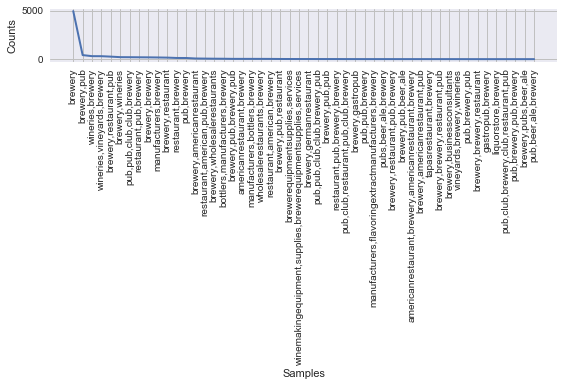

None


In [51]:
# frequency distribution
freq_words = nltk.FreqDist(cats_clean)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(50))

In [52]:
denver['desired'] = denver.categories.str.lower() 
denver['brewery'] = denver.desired.str.contains('brewery')
denver['music'] = denver.desired.str.contains('music')
denver['wineries'] = denver.desired.str.contains('wineries')
denver['restaurant'] = denver.desired.str.contains('restaurant')
denver['pizza'] = denver.desired.str.contains('pizza')

In [53]:
denver[0:5]

,categories,city,desired,brewery,music,wineries,restaurant,pizza
568,Brewery,Denver,brewery,True,False,False,False,False
640,Breweries & Wineries,Denver,breweries & wineries,False,False,True,False,False
700,"Music Venue,Bar and Music Venue,Bar,Pubs,Bars ...",Denver,"music venue,bar and music venue,bar,pubs,bars ...",False,True,False,False,False
770,"Music Venue,Bars & Pubs,Pubs,Breweries,Bar",Denver,"music venue,bars & pubs,pubs,breweries,bar",False,True,False,False,False
1002,"American Restaurant,Brewery,Fast Food Restaura...",Denver,"american restaurant,brewery,fast food restaura...",True,False,False,True,False


In [54]:
df['desired'] = df.categories.str.lower() 

In [55]:
df_str_2 = df.desired.to_string()

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


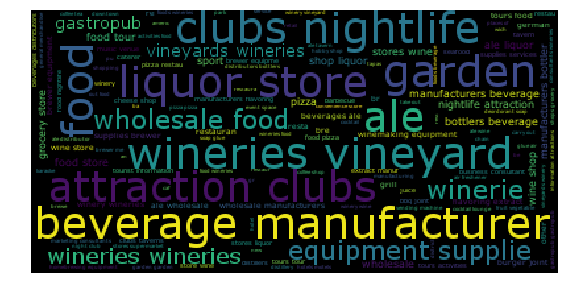

In [56]:
#create a wordclouds for string objects
denver_wc = WordCloud(font_path='/Library/Fonts/Verdana.ttf',
                      relative_scaling = 0,
                      stopwords = {'place','restaurants','drink','store''brewer','beer','pubs','bars','brewery','restaurant','denver','breweries','brew','pub','brewers','american','and','bar'} 
                      ).generate(df_str_2)
plt.imshow(denver_wc)
plt.axis("off")
plt.show() 

In [57]:
df.province.describe()

count     17823
unique      870
top          CA
freq       2707
Name: province, dtype: object

In [58]:
df.postalCode.describe()

count     17198
unique     6334
top       93446
freq         51
Name: postalCode, dtype: object

In [59]:
print(df.twitter.isnull()[0:5])

0     True
1     True
2     True
3     True
4    False
Name: twitter, dtype: bool


In [60]:
df.websites[0:5]

0                         NaN
1                         NaN
2    http://fresnobrewing.com
3                         NaN
4    http://flat12.me/brewery
Name: websites, dtype: object

In [61]:
df.twitter[0:5]

0                NaN
1                NaN
2                NaN
3                NaN
4    flat12bierwerks
Name: twitter, dtype: object

In [62]:
df[df.desired.str.contains('music')].count()

id            92
address       92
categories    92
city          92
country       92
hours         78
keys          92
latitude      69
longitude     69
menus         15
name          92
postalCode    90
province      92
twitter       35
websites      55
desired       92
dtype: int64

[('brewery', 1336), ('restaurants', 846), ('brewers', 836), ('beer ', 699), ('food ', 699), ('breweries', 667), ('bars', 630), ('vineyards', 598), ('bar', 538), (' brew pubs', 507), (' drink', 496), (' ale', 487), ('brew pubs', 475), ('pubs', 450), ('wineries', 378), (' ', 363), ('american restaurant', 358), ('clubs ', 333), (' nightlife', 327), ('american', 299), ('restaurant', 297), ('brewery ', 288), ('bar ', 240), ('bars ', 236), ('pub', 235), ('liquor stores', 231), ('beverage manufacturers', 223), ('bars clubs', 207), (' clubs', 204), ('breweries ', 203), (' brewery', 194), ('pizza', 194), (' supplies', 187), (' pubs', 184), ('beer garden', 182), ('beverages', 182), ('pizza place', 165), ('taverns', 158), ('bars pubs', 141), ('gastropub', 113), ('wine', 107), (' bar', 100), ('bottlers', 93), (' ale-wholesale ', 88), (' grills', 88), ('nightlife', 83), ('american restaurants', 80), (' manufacturers', 79), ('karaoke', 78), ('wine shop', 76)]
<FreqDist with 13785 samples and 33684 o

/Users/saultamariz/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


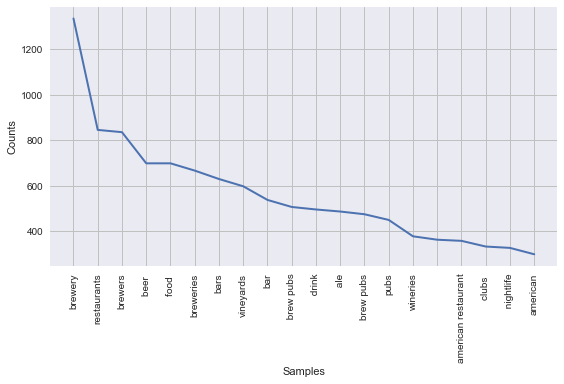

None


In [163]:
# dataframe for just reviews
des_new = df[['desired']]

# create two dataframes and string objects
des_new_str = des_new.to_string()
des_new_str = des_new_str.replace('and',',')
des_new_str = des_new_str.replace('&',',')
des_new_str = des_new_str.split(',')


# frequency distribution
freq_words = nltk.FreqDist(des_new_str)
print(freq_words.most_common(50))
print(freq_words)
print(freq_words.plot(20))

In [114]:
df_words = df.desired.to_string()

In [115]:
def word_token(text):
    word_token = nltk.word_tokenize(text)
    return word_token

In [116]:
token_list = word_token(df_words)

In [128]:
print(token_list[0:25])

['0', 'brewery', '1', 'office', 'and', 'cafeteria', 'brewer', "'s", 'hill', '2', 'brewery', 'downtown', 'clovis', '3', 'breweries', '&', 'brew', 'pubs', '4', 'brewery', 'and', 'gastropub', 'downtown', 'jeffersonville', '5']


In [146]:
from nltk.stem import LancasterStemmer

In [147]:
ls = LancasterStemmer()

In [158]:
print(ls.stem('jumping'))

jump


In [180]:
frames = denver, portland, chicago, sea, sd
topcities = pd.concat(frames)


In [186]:
topcities.describe()

,brewery,categories,city,desired,music,pizza,restaurant,wineries
count,216,1177,1177,216,216,216,216,216
unique,2,609,5,119,2,2,2,2
top,True,Brewery,San Diego,brewery,False,False,False,False
freq,138,146,294,36,214,204,135,203
